In [54]:
# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime
globalstart = datetime.now()

In [2]:
import pandas as pd
import numpy as np

In [1]:
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

In [28]:
import os
if not os.path.isfile('train.csv'):
    # Create a file 'train.csv' before reading it
    # Read all the files in netflix and store them in one big file('train.csv')
    # We re reading from each of the four files and appendig each rating to a global file 'train.csv'
    train = open('train.csv', mode='a')

    row = list()
    files=['netflix/combined_data_1.txt','netflix/combined_data_2.txt', 
           'netflix/combined_data_3.txt', 'netflix/combined_data_4.txt']
    for file in files:
        with open(file) as f:
            for line in f: 
                del row[:] # you don't have to do this.
                line = line.strip()
                if line.endswith(':'):
                    # All below are ratings for this movie, until another movie appears.
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    train.write(','.join(row))
                    train.write('\n')
    train.close()

True

___Before Reading train.csv : ___ 
- There are some duplicates in our dataflie (__around 700__).
    - Not so many.. in 100M ratings.., but duplicates are duplicates.


- You might have to write ADDITIONAL CODE to remove that errors in original file to remove those duplicate entries
    - (___You can even run with duplicates also.. It won't effect much___)


- The file that is present in disk is __free from duplicates__

In [ ]:
# Now, we have train.csv in the dsik. Just read from it.
 #############(movie, user, rating, date)######
train_df = pd.read_csv('train.csv', sep=',', 
                       names=['movie', 'user','rating','date'],
                      parse_dates=['date'], index_col='date')
train_df.head()
    

## Is there any rating that has incorrect entry...?  

In [4]:
sum(train_df.rating > 5.0)

0

## No. of Ratings, Users and Movies 

In [6]:
movies = train_df.movie.value_counts().sort_index()
users = train_df.user.value_counts().sort_index()
ratings = train_df.rating

print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of Users   :", len(users))
print("Total No of movies  :", len(movies))


Total no of ratings : 100479540
Total No of Users   : 480189
Total No of movies  : 17770


In [5]:
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

<IPython.core.display.Javascript object>


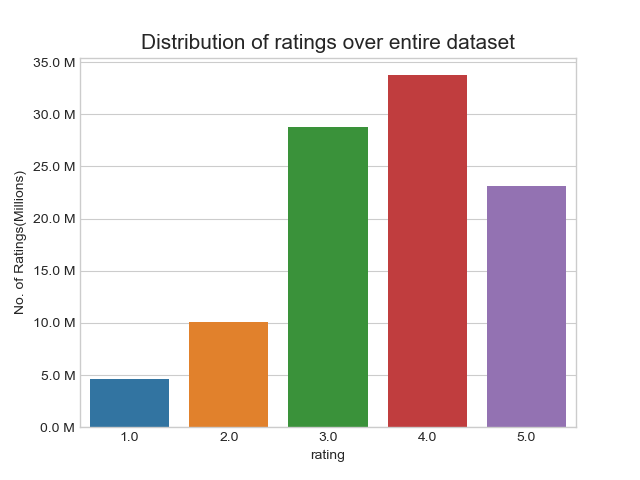

In [9]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings over entire dataset', fontsize=15)
sns.countplot(train_df.rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

### Add new columns to the data set year, month and week day for analysis.

In [11]:
train_df['year']  = train_df.index.year
train_df['month'] = train_df.index.month
train_df['day_of_week'] = train_df.index.weekday_name

In [12]:
train_df.head()

,movie,user,rating,year,month,day_of_week
date,,,,,,
2005-09-06,1,1488844,3.0,2005,9,Tuesday
2005-05-13,1,822109,5.0,2005,5,Friday
2005-10-19,1,885013,4.0,2005,10,Wednesday
2005-12-26,1,30878,4.0,2005,12,Monday
2004-05-03,1,823519,3.0,2004,5,Monday


<IPython.core.display.Javascript object>


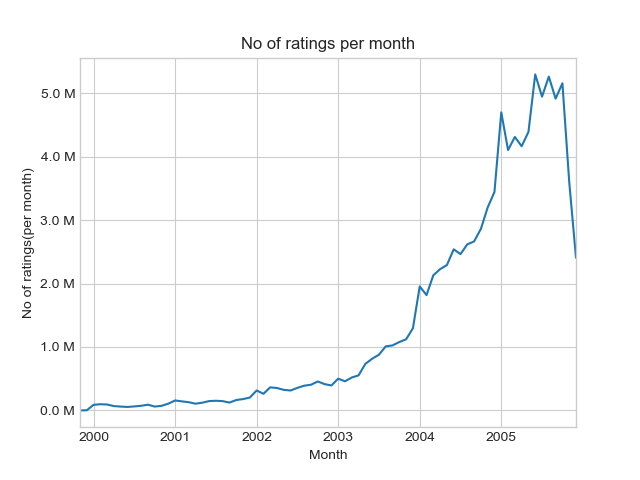

In [13]:
ax = train_df.resample('m')['rating'].count().plot()
ax.set_title('No of ratings per month')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

In [14]:
temp_df = train_df[train_df.movie==15].groupby(['rating'])['user'].count()

In [15]:
temp_df.head()

rating
1.0    30
2.0    35
3.0    88
4.0    96
5.0    41
Name: user, dtype: int64

<IPython.core.display.Javascript object>


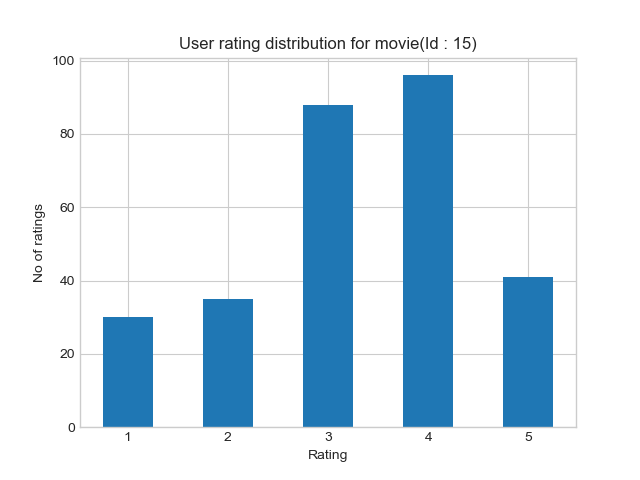

In [16]:
plt.bar(temp_df.index, temp_df.values,width=0.5)
plt.title('User rating distribution for movie(Id : 15)')
plt.xlabel('Rating')
plt.ylabel('No of ratings')
plt.show()

<IPython.core.display.Javascript object>


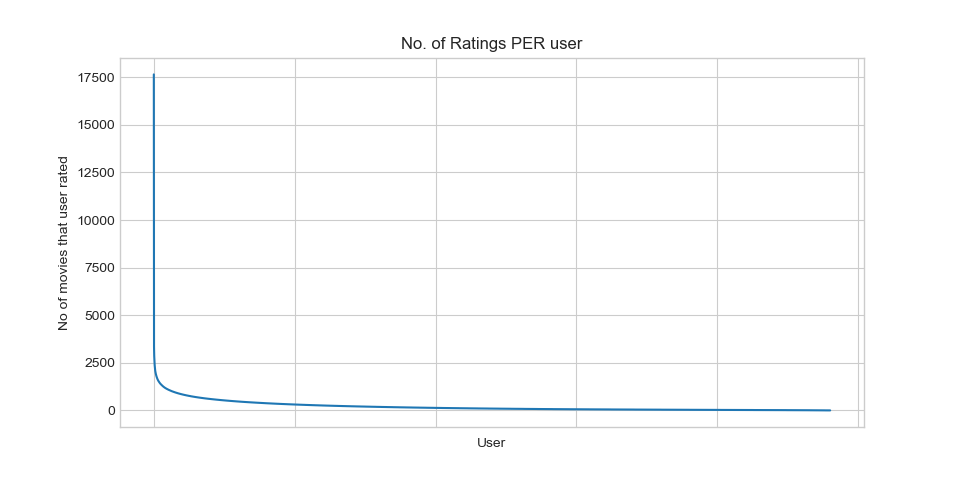

In [17]:
no_of_rated_movies_per_user = train_df.groupby(by='user')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()

plt.plot(no_of_rated_movies_per_user.values)
plt.title('No. of Ratings PER user', fontsize=20)
plt.xlabel('User', fontsize=15)
plt.ylabel('No of movies that user rated', fontsize=15)
ax.set_xticklabels([])

plt.show()

<IPython.core.display.Javascript object>


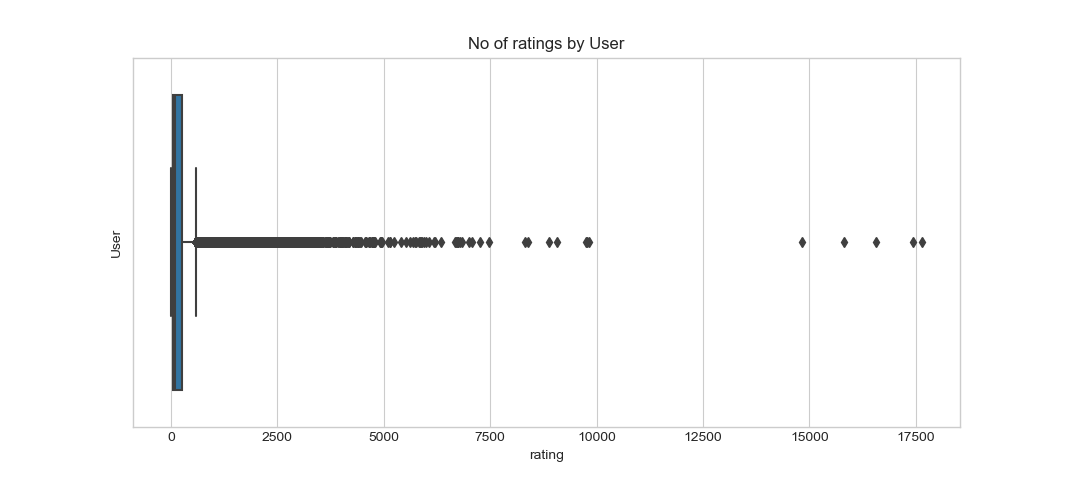

In [113]:
fig = plt.figure(figsize=plt.figaspect(.45))
ax = plt.gca()
plt.title("")
plt.xlabel("No of ratings by User")
plt.ylabel("User")
sns.boxplot(x=no_of_rated_movies_per_user, ax=ax)
plt.show()

<IPython.core.display.Javascript object>


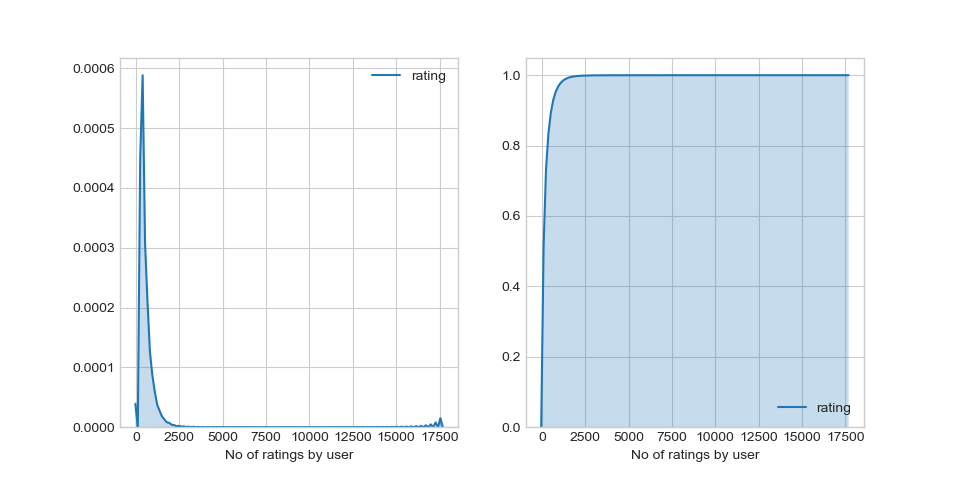

In [26]:
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

In [29]:
no_of_rated_movies_per_user.describe()

count    480189.000000
mean        209.249983
std         302.336332
min           1.000000
25%          39.000000
50%          96.000000
75%         259.000000
max       17653.000000
Name: rating, dtype: float64

In [50]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<IPython.core.display.Javascript object>


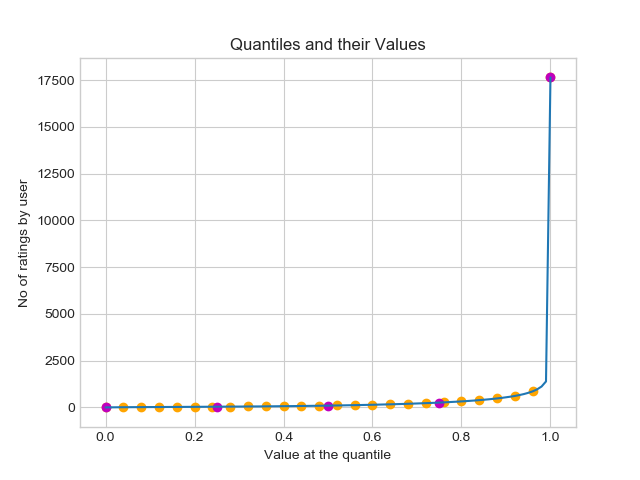

In [112]:
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.04 difference
plt.scatter(x=quantiles.index[::4], y=quantiles.values[::4], c='orange', label="quantiles with 0.13 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

__ Let's look at the ratings at last 10% __?? 

In [90]:
quantiles.values[-10:]

array([  575,   614,   660,   713,   779,   859,   966,  1117,  1390,
       17653], dtype=int64)

In [106]:
no_of_rated_movies_per_user.shape

(480189,)

__how many ratings at the last 1% of all ratings__??

In [102]:
sum(no_of_rated_movies_per_user>= 1390)

4811

__# of ratings that are LESS_THAN_600__

In [36]:
sum(no_of_rated_movies_per_user<=600)

NameError: name 'no_of_rated_movies_per_user' is not defined

<IPython.core.display.Javascript object>


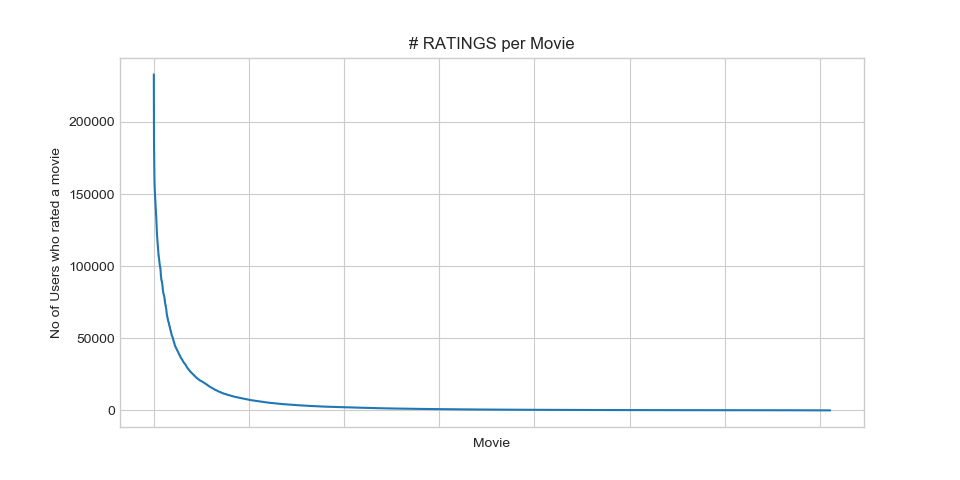

In [18]:
no_of_ratings_per_movie = train_df.groupby(by='movie')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

<IPython.core.display.Javascript object>


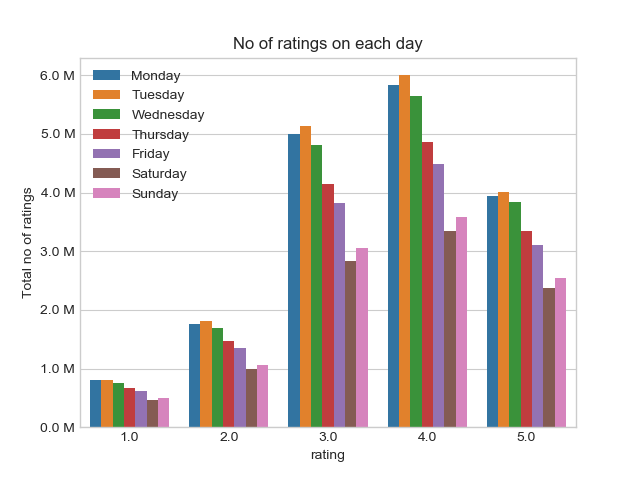

In [19]:
fig, ax = plt.subplots()

sns.countplot(x='rating', data=train_df, hue='day_of_week', 
              hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday',
                         'Saturday', 'Sunday'])
plt.title('No of ratings on each day')
plt.ylabel('Total no of ratings')
plt.legend(loc='upper left')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

<IPython.core.display.Javascript object>


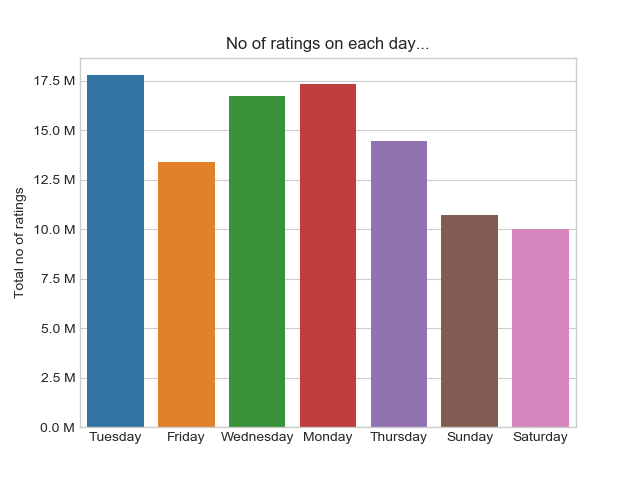

In [20]:
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=train_df, ax=ax)
plt.title('No of ratings on each day...')
plt.ylabel('Total no of ratings')
plt.xlabel('')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

<IPython.core.display.Javascript object>


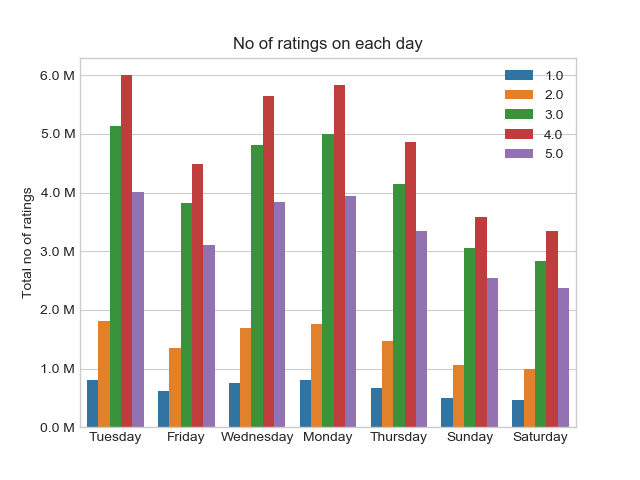

In [21]:
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=train_df, hue='rating', ax=ax)
plt.title('No of ratings on each day')
plt.ylabel('Total no of ratings')
plt.xlabel('')
plt.legend(loc='best')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

<IPython.core.display.Javascript object>


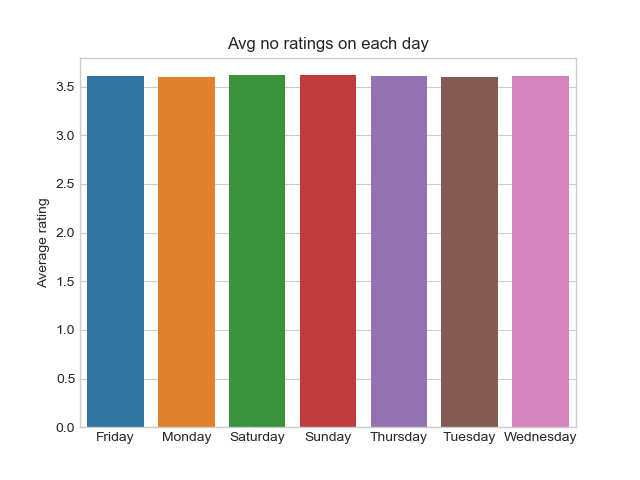

In [22]:
avg_week_df = train_df.groupby(by=['day_of_week'])['rating'].mean()
sns.barplot(x=avg_week_df.index, y=avg_week_df.values)
plt.title('Avg no ratings on each day')
plt.ylabel('Average rating')
plt.xlabel('')
plt.show()

---------------
# 2. Creating sparse matrix for user-movie-rating from dataframe 
-----------------

In [33]:
import os
from scipy import sparse

if os.path.isfile('sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sparse_matrix = sparse.load_npz('sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    sparse_matrix = sparse.csr_matrix((train_df.rating.tolist(), (train_df.user.tolist(),
                                               train_df.movie.tolist())), 
                           shape=(max(train_df.user)+1,max(train_df.movie)+1))
    print('Done. It\'s shape is : (user, movie) : ',sparse_matrix.shape)

## PDF's & CDF's of Avg.Ratings of Users & Movies

In [35]:
# u : row indices(userIds) that has an entry(rating to some movie)
# m : column indices(movieIds) that has an entry(rated by some user)
#  One entry from both (x and y) is a non-zero entry....
u,m = sparse_matrix.nonzero()


# ".A1" is for converting Column matrix to 1-D numpy array 
sum_of_ratings_per_user = sparse_matrix.sum(axis=1).A1
# no of ratings that each user has given.
no_ratings_per_user = sparse_matrix.getnnz(axis=1)


# sum of the ratings that a movie got by any user(who rated that movie..)
sum_of_ratings_per_movie = sparse_matrix.sum(axis=0).A1
# no of ratings that a movie got.
no_ratings_per_movie = sparse_matrix.getnnz(axis=0)

# calculate AVERAGE Rating w.r.t user and movie.
avg_rating_per_movie = np.divide(sum_of_ratings_per_movie, no_ratings_per_movie, where=no_ratings_per_movie!=0)
avg_rating_per_user  = np.divide(sum_of_ratings_per_user, no_ratings_per_user, where=no_ratings_per_user!=0)

# We don't get empty columns(movies), but We have empty rows(users),
# Because all movies are from 1 to 2,649,430. But users are selected at random...
avg_rating_per_user = avg_rating_per_user[avg_rating_per_user!=0]

<IPython.core.display.Javascript object>


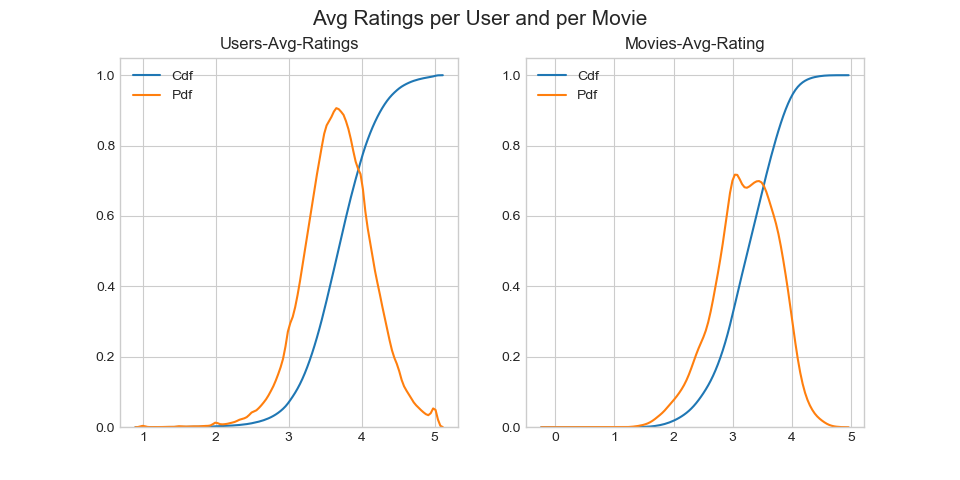

In [36]:
# draw pdfs for average rating per user and average
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

# print('plotting cdf of user')
ax1.set_title('Users-Avg-Ratings')
sns.distplot(avg_rating_per_user, ax=ax1, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
# print('plotting pdf of user')
sns.distplot(avg_rating_per_user, ax=ax1, hist=False,label='Pdf')

# print('plotting cdf of movie')
ax2.set_title('Movies-Avg-Rating')
sns.distplot(avg_rating_per_movie, ax=ax2, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
# print('plotting pdf of movie')
sns.distplot(avg_rating_per_movie, ax=ax2, hist=False, label='Pdf')

plt.show()

----------------------------------------

# 3.1 Computing Similarity matrices

---------------

## 3.1.1 Computing User-User Similarity matrix

1. Calculating User User Similarity_Matrix is not possible because of **2.6 M * 2.6 M** dimensions...

    * It is better to calculate them on the fly ( whenever required and store them without the need of re computing them again when its necessary...
    * You can try If you want to. Your system will crash or Program stops with **Memory Error**

#### But, Let's just try...

In [14]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime
import numpy as np

def compute_user_similarity(sparse_matrix, compute_for_few=False, top = 100, verbose=False, verb_for_n_rows = 5,
                            draw_time_taken=True):
    no_of_users, _ = sparse_matrix.shape
    # get the indices of  non zero rows(users) from our sparse matrix
    row_ind, col_ind = sparse_matrix.nonzero()
    row_ind = sorted(set(row_ind)) # we don't have to
    time_taken = list() #  time taken for finding similar users for an user..
    
    # we create rows, cols, and data lists.., which can be used to create sparse matrices
    rows, cols, data = list(), list(), list()
    if verbose: print("Computing top",top,"similarities for each user..")
    
    start = datetime.now()
    temp = 0
    
    for row in row_ind[:50] if compute_for_few else row_ind:
        temp = temp+1
        prev = datetime.now()
        
        # get the similarity row for this user with all other users
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()
        # We will get only the top ''top'' most similar users and ignore rest of them..
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]
        
        # add them to our rows, cols and data
        rows.extend([row]*top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        time_taken.append(datetime.now().timestamp() - prev.timestamp())
        if verbose:
            if temp%verb_for_n_rows == 0:
                print("computing done for {} users [  time elapsed : {}  ]"
                      .format(temp, datetime.now()-start))
            
        
    # lets create sparse matrix out of these and return it
    if verbose: print('Creating Sparse matrix from the computed similarities')
    #return rows, cols, data
    
    if draw_time_taken:
        plt.plot(time_taken, label = 'time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (seconds)')
        plt.show()
        
    return csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users)), time_taken      

Computing top 1000 similarities for each user..
computing done for 10 users [  time elapsed : 0:00:42.432851  ]
computing done for 20 users [  time elapsed : 0:01:28.249120  ]
computing done for 30 users [  time elapsed : 0:02:13.547444  ]
computing done for 40 users [  time elapsed : 0:02:59.541499  ]
computing done for 50 users [  time elapsed : 0:03:46.115776  ]
Creating Sparse matrix from the computed similarities


<IPython.core.display.Javascript object>


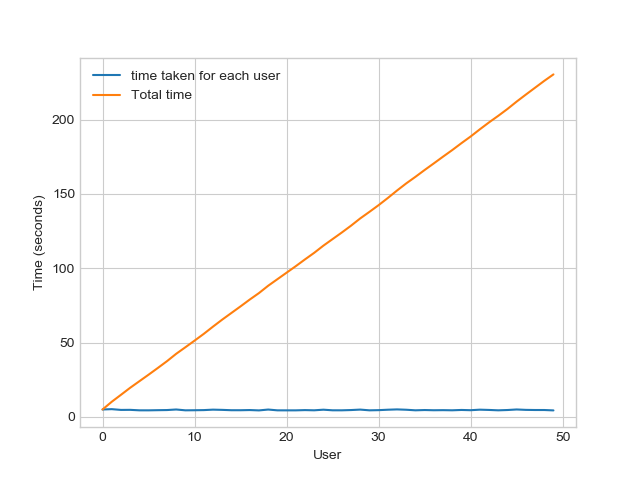

------------------------------------------------------------------------------------------------------------------------------------------------------
Time taken : 0:04:00.570270


In [52]:
start = datetime.now()
u_u_sim_sparse, _ = compute_user_similarity(sparse_matrix, compute_for_few=True, top = 1000,
                                                     verbose=True, verb_for_n_rows=10)
print("-"*100)
print("Time taken :",datetime.now()-start)

###  Using TruncatedSVD for dimensionality reduction of user vector


* We have around **480K users** and computing similarities between them..( **17K dimensional vector..**) is time consuming..


* Instead we will reduce the dimension of Movie and then we can compute the similarities between them. 

In [30]:
from sklearn.decomposition import TruncatedSVD

# initilaize the algorithm with some parameters..
# All of them are default except n_components. n_itr is for Randomized SVD solver.
netflix_svd = TruncatedSVD(n_components=500, algorithm='randomized', random_state=15)

In [34]:
from datetime import datetime

start = datetime.now()
trunc_matrix = netflix_svd.fit_transform(sparse_matrix)
print(datetime.now()-start)

0:20:01.860789


Here,


- $\sum \longleftarrow$ (netflix\_svd.**singular\_values\_** )


- $\bigvee^T \longleftarrow$ (netflix\_svd.**components_**)


- $\bigcup$ is not returned. instead **Projection_of_X** onto the new vectorspace is returned. 


- It uses **randomized svd** internally, which returns **All 3 of them saperately**. Use that instead.. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
expl_var = np.cumsum(netflix_svd.explained_variance_ratio_)

<IPython.core.display.Javascript object>


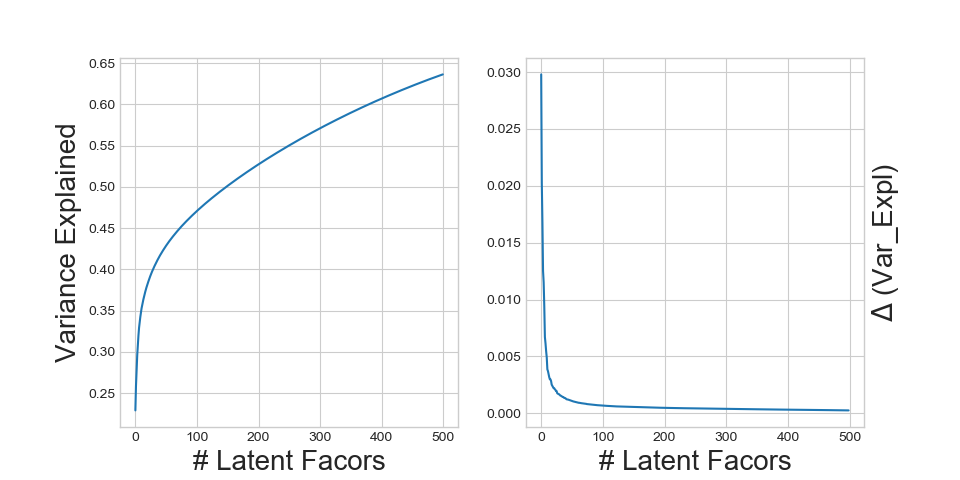

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))

ax1.set_ylabel("Variance Explained", fontsize=20)
ax1.set_xlabel("# Latent Facors", fontsize=20)
ax1.plot(expl_var)

ax2.plot([expl_var[i+1] - expl_var[i] for i in range(len(expl_var)-1)])
ax2.set_ylabel("$\Delta$ (Var_Expl)", fontsize=20)
ax2.yaxis.set_label_position("right")
ax2.set_xlabel("# Latent Facors", fontsize=20)

plt.show()


** I think 500 dimensions is good enough *** 
--
---------

In [18]:
# Let's project our Original U_M matrix into into 500 Dimensional space...
start = datetime.now()
trunc_matrix = sparse_matrix.dot(netflix_svd.components_.T)
print(datetime.now()- start)

0:00:28.162461


In [50]:
type(trunc_matrix), trunc_matrix.shape

(numpy.ndarray, (2649430, 500))

* Let's convert this to actual sparse matrix and store it for future purposes

In [8]:
if not os.path.isfile('trunc_sparse_matrix.npz'):
    # create that sparse sparse matrix
    trunc_sparse_matrix = sparse.csr_matrix(trunc_matrix)
    # Save this truncated sparse matrix for later usage..
    sparse.save_npz('trunc_sparse_matrix', trunc_sparse_matrix)
else:
    trunc_sparse_matrix = sparse.load_npz('trunc_sparse_matrix.npz')

In [9]:
trunc_sparse_matrix.shape

(2649430, 500)

Computing top 100 similarities for each user..
computing done for 5 users [  time elapsed : 0:00:44.066391  ]
computing done for 10 users [  time elapsed : 0:01:26.911401  ]
computing done for 15 users [  time elapsed : 0:02:11.886631  ]
computing done for 20 users [  time elapsed : 0:02:55.063094  ]
computing done for 25 users [  time elapsed : 0:03:37.550126  ]
computing done for 30 users [  time elapsed : 0:04:20.700202  ]
computing done for 35 users [  time elapsed : 0:05:03.552319  ]
computing done for 40 users [  time elapsed : 0:05:45.675900  ]
computing done for 45 users [  time elapsed : 0:06:28.050130  ]
computing done for 50 users [  time elapsed : 0:07:11.439021  ]
Creating Sparse matrix from the computed similarities


<IPython.core.display.Javascript object>


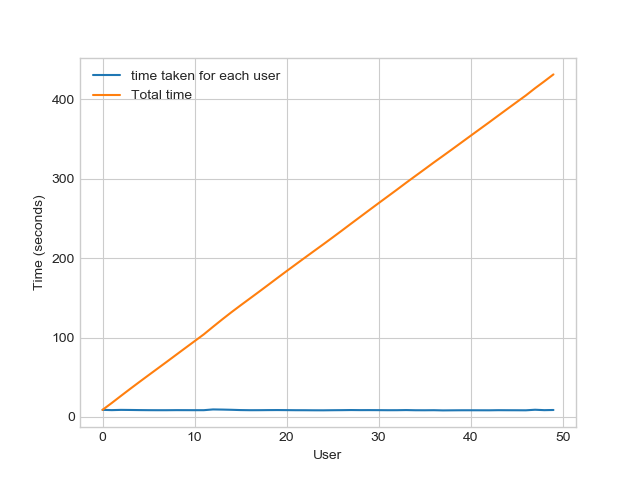

--------------------------------------------------
time: 0:07:35.344370


In [15]:
start = datetime.now()
trunc_u_u_sim_matrix, _ = compute_user_similarity(trunc_sparse_matrix, compute_for_few=True, top=100, verbose=True, 
                                                 verb_for_n_rows=5)
print("-"*50)
print("time:",datetime.now()-start)

**: This is taking more time for each user than Original one.**

- ### Why did this happen...??


    - Just think about it. It's not that difficult.

---------------------------------___( SPARSE & DENSE..................get it ?? )___-----------------------------------

* ### Is there any other way to compute user user similarity..??

- The only way I can think of right now is to compute similar users for a perticular user, is to do it whnenver required(**ie., Run time**)
    - We maintain a binary Vector for users, which tells us whether we already computed or not..
    - ***If not*** : 
        - Compute top (let's just say, 1000) most similar users for this given user, and add this to our datastructure, so that we can just access it(similar users) without recomputing it again.
        - 
    - ***If It is already Computed***:
        - Just get it directly from our datastructure, which has that information.
        - In production time, We might have to recompute similarities, if it is computed a long time ago. Because user preferences changes over time. If we could maintain some kind of Timer, which when expires, we have to update it ( recompute it ). 
        - 
    - ***Which datastructure to use:***
        - It is purely implementation dependant. 
        - One simple method is to maintain a **Dictionary Of Dictionaries**.
            - 
            - **key    :** _userid_ 
            - __value__: _Again a dictionary_
                - __key__  : _Similar User_
                - __value__: _Similarity Value_

## 3.1.2 Computing Movie-Movie similarity matrix

In [40]:
from datetime import datetime
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
import os
from scipy import sparse
from datetime import datetime

if not os.path.isfile('m_m_sim_sparse.npz'):
    print("It is not present offline. So, computing movie_movie similarity...")
    start = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=sparse_matrix.T, dense_output=False)
    # store this sparse matrix in disk before using it. For future purposes.
    sparse.save_npz("m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
    print(datetime.now()-start)
else:
    print("It is there, We will get it.")
    m_m_sim_sparse = sparse.load_npz("m_m_sim_sparse.npz")


In [27]:
m_m_sim_sparse.shape

(17771, 17771)

In [ ]:
print("-"*100)
print("Total time taken to run this entire notebook ( with saved files) is :",datetime.now()-globalstart)